In [1]:
# import logging
import os
import re
from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import torch
import yaml
from einops import rearrange

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from mushroom.mushroom_v2 import Mushroom
import mushroom.utils as utils

/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packag

In [5]:
run_dir = '/data/estorrs/mushroom/data/projects/subclone'
mushroom_dir = os.path.join(run_dir, 'mushroom')
config_fps = sorted(utils.listfiles(mushroom_dir, regex=r'/config.yaml'))
config_fps

['/data/estorrs/mushroom/data/projects/subclone/mushroom/HT112C1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT206B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT225C1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT226C1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT235B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT243B1-H3/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT243B1-H4/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT268B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT271B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT339B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT397B1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT413C1/config.yaml',
 '/data/estorrs/mushroom/data/projects/subclon

In [6]:
visium_config = {
    'dtype': 'visium',
#     'sections': config,
    'chkpt_filepath': None,
    'sae_kwargs': {
        'size': 256,
        'patch_size': 32,
        'encoder_dim': 256,
        'kl_scaler': .001,
        'recon_scaler': 1.,
        'neigh_scaler': .1,
        'codebook_size': 100,
        'decoder_dims': (256, 1000, 5000,)
    },
    'learner_kwargs': {
        'scale': .1,
        'contrast_pct': None,
#         'pct_expression': .02,
        'batch_size': 64,
        'num_workers': 1,
        'device': 'cpu',
#         'channels': channels,
#         'channel_mapping': channel_mapping
    },
    'train_kwargs': {
        'num_iters': 10000,
        'lr': 1e-4,
        'log_every': 10,
        'save_every': 500,
#         'save_dir': chkpt_dir       
    },
    'cluster_kwargs': {
        'num_clusters': 20,
        'mask_background': True,
        'margin': .05,
        'background_channels': None,
        'span_all_sections': True,
        'centroids': None,
    }
}

In [7]:
config_fp = '/data/estorrs/mushroom/data/projects/subclone/mushroom/HT397B1/config.yaml'

case = config_fp.split('/')[-2]
out_dir = os.path.join(f'/data/estorrs/mushroom/data/projects/testing/mushroom/{case}_vae_vq_visium/outputs')

config = yaml.safe_load(open(config_fp))

chkpt_dir = os.path.join(out_dir, 'chkpts')
Path(chkpt_dir).mkdir(parents=True, exist_ok=True)

In [8]:
visium_config['sections'] = config
visium_config['train_kwargs']['save_dir'] = chkpt_dir
visium_config['chkpt_filepath'] = os.path.join(chkpt_dir, '1000iter.pt')

In [9]:
mushroom = Mushroom.from_config(visium_config)

INFO:root:using device: cpu
INFO:root:generating inputs for visium tissue sections
INFO:root:using 11622 channels
INFO:root:2 sections detected: ['s0', 's3']
INFO:root:processing sections
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:creating data loaders
INFO:root:creating ViT
INFO:root:learner initialized
INFO:root:initializing clusterer


In [10]:
mushroom.true_imgs.shape

torch.Size([2, 11622, 60, 60])

In [11]:
mushroom.embed_sections()

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

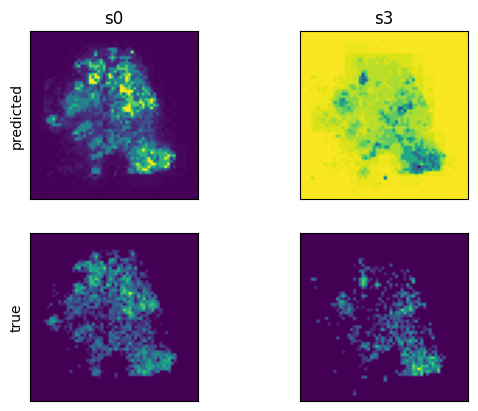

In [12]:
mushroom.display_predicted_pixels(channel='EPCAM')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

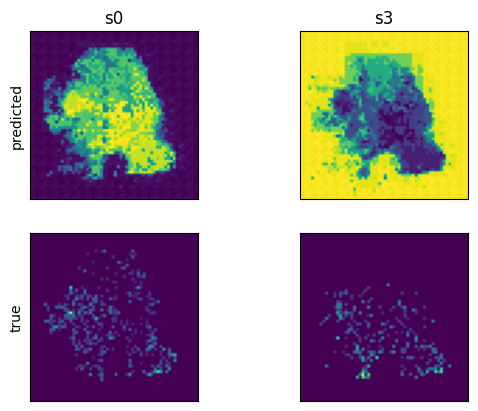

In [13]:
mushroom.display_predicted_pixels(channel='IL7R')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

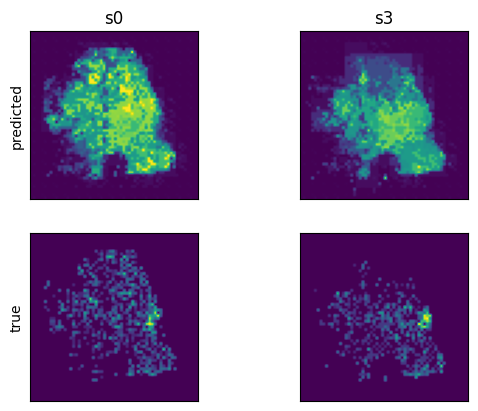

In [14]:
mushroom.display_predicted_pixels(channel='CD68')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's3'}>],
       [<Axes: ylabel='true'>, <Axes: >]], dtype=object)

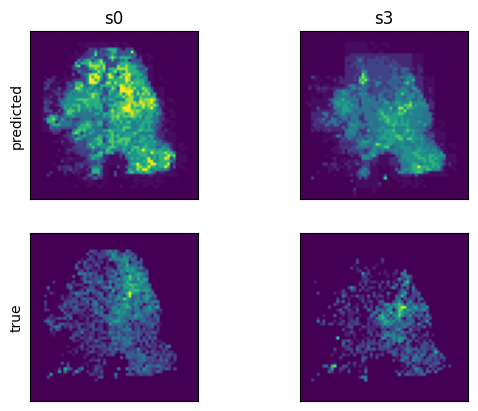

In [15]:
mushroom.display_predicted_pixels(channel='ACTA2')

In [16]:
mushroom.recon_cluster_ids.shape

torch.Size([2, 60, 60])

In [17]:
# cluster_ids = mushroom.recon_cluster_probs.argmax(dim=1).cpu().detach().numpy()
cluster_ids = mushroom.recon_cluster_ids.cpu().detach().numpy().astype(int)

In [18]:
mushroom.recon_embs.shape

torch.Size([2, 256, 60, 60])

In [19]:
cluster_ids.shape

(2, 60, 60)

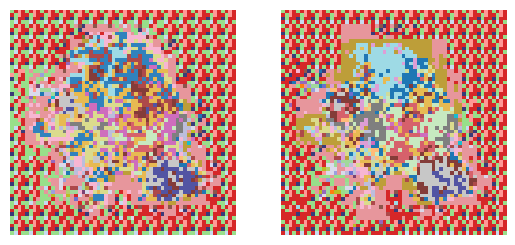

In [20]:
from mushroom.visualization.utils import display_labeled_as_rgb
cmap = sns.color_palette('tab20') + sns.color_palette('tab20b') + sns.color_palette('tab20c') + sns.color_palette('tab20') + sns.color_palette('tab20b') + sns.color_palette('tab20c')
fig, axs = plt.subplots(ncols=len(cluster_ids))
for ax, x in zip(axs, cluster_ids):
    x = display_labeled_as_rgb(x, cmap=cmap)
    ax.imshow(x)
    ax.axis('off')

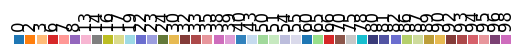

In [21]:
labels = np.unique(cluster_ids)
fig, axs = plt.subplots(ncols=len(labels))
for n, l in enumerate(labels):
    axs[n].imshow(rearrange(np.asarray(cmap[l]), 'n -> 1 1 n'))
    axs[n].axis('off')
    axs[n].set_title(str(l), rotation=90)
    

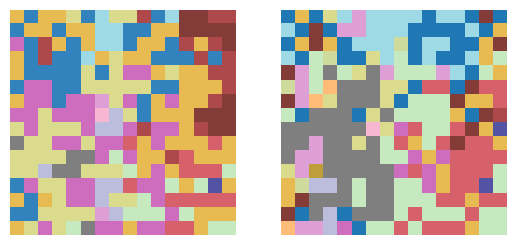

In [22]:
from mushroom.visualization.utils import display_labeled_as_rgb
cmap = sns.color_palette('tab20') + sns.color_palette('tab20b') + sns.color_palette('tab20c') + sns.color_palette('tab20') + sns.color_palette('tab20b') + sns.color_palette('tab20c')
fig, axs = plt.subplots(ncols=len(cluster_ids))
for ax, x in zip(axs, cluster_ids):
    x = display_labeled_as_rgb(x[20:36, 20:36], cmap=cmap)
    ax.imshow(x)
    ax.axis('off')

In [23]:
mushroom.cluster_sections(margin=.1, num_clusters=20)

INFO:root:no background channel detected, defaulting to mean of all channels
/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 13] Permission denied: 'lscpu'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/joblib/externals/loky/backend/context.py", line 250, in _count_physical_cores
    cpu_info = subprocess.run(
  File "/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/data/estorrs/miniconda3/en

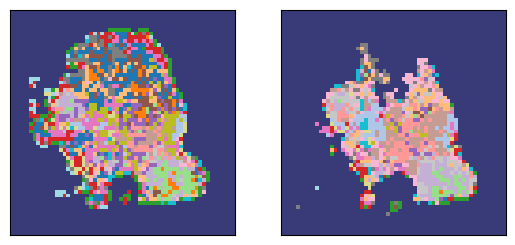

In [24]:
mushroom.clusterer.display_cluster_ids(mushroom.cluster_ids)


In [25]:
mushroom.recon_embs.shape

torch.Size([2, 256, 60, 60])

In [26]:
mushroom.learner.sae.vq.codebook.shape

torch.Size([100, 256])

In [27]:
dists = torch.cdist(
    rearrange(mushroom.recon_embs, 'n c h w -> n h w c'),
    mushroom.learner.sae.vq.codebook
)
dists.shape

torch.Size([2, 60, 60, 100])

In [28]:
import torch.nn.functional as F

In [29]:
x = rearrange(mushroom.recon_embs, 'n c h w -> n h w c')
codebook = mushroom.learner.sae.vq.codebook
dists = torch.zeros(x.shape[0], x.shape[1], x.shape[2], codebook.shape[0])
for n in range(x.shape[0]):
    for h in range(x.shape[1]):
        for w in range(x.shape[2]):
            for c in range(codebook.shape[0]):
                dists[n, h, w, c] = F.cosine_similarity(x[n, h, w], codebook[c], dim=0)
dists.shape

torch.Size([2, 60, 60, 100])

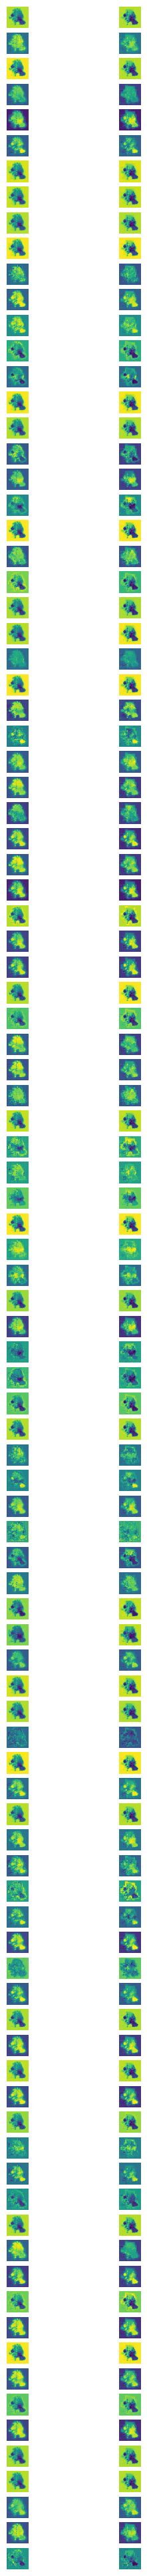

In [30]:
fig, axs = plt.subplots(nrows=dists.shape[-1], ncols=dists.shape[0], figsize=(4, 50))
for c in range(dists.shape[0]):
    for r in range(dists.shape[-1]):
        ax = axs[r, c]
        ax.imshow(dists[c, ..., r])
        ax.axis('off')
        ax.set_ylabel(r, rotation=90)

In [31]:
# fig, axs = plt.subplots(nrows=dists.shape[-1], ncols=dists.shape[0], figsize=(3, 25))
# for c in range(dists.shape[0]):
#     for r in range(dists.shape[-1]):
#         ax = axs[r, c]
#         ax.imshow(dists[c, ..., r])
#         ax.axis('off')

In [32]:
mushroom.recon_imgs.shape

torch.Size([2, 11622, 60, 60])

In [33]:
from scipy.stats import spearmanr, pearsonr

In [34]:
import torchvision.transforms.functional as TF

distances = rearrange(dists, 'n h w c -> n c h w')

patch_size = 32
exp = TF.resize(
    mushroom.true_imgs,
    (distances.shape[-2], distances.shape[-1]),
    antialias=False,
).numpy()
exp.shape

(2, 11622, 60, 60)

In [ ]:
data = []

for i, channel in enumerate(mushroom.learner.channels):
    y = exp[:, i].flatten()
    row = []
    for j in range(distances.shape[1]):
        x = distances[:, j].flatten()
        corr, pval = spearmanr(x, y)
        row.append(corr)
    data.append(row)

df = pd.DataFrame(data=data, index=mushroom.learner.channels, columns=list(range(distances.shape[1])))
df = df.transpose()
df


In [ ]:
df.sort_values('CD31', ascending=False)

In [ ]:
df.sort_values('CD31', ascending=False)

In [ ]:
clusters = df.sort_values('CD31', ascending=False).index.to_list()[:5]
fig, axs = plt.subplots(nrows=len(clusters), ncols=distances.shape[0], figsize=(5, 4))
for i, cluster in enumerate(clusters):
    for j in range(distances.shape[0]):
        ax = axs[i, j]
#         ax.imshow(exp[j, mushroom.learner.channels.index('CD31')])
        ax.imshow(distances[j, cluster])
        ax.axis('off')

In [ ]:
clusters = df.sort_values('CD31', ascending=False).index.to_list()[:10]
fig, axs = plt.subplots(nrows=len(clusters), ncols=cluster_ids.shape[0], figsize=(5, 10))
for i, cluster in enumerate(clusters):
    for j in range(cluster_ids.shape[0]):
        ax = axs[i, j]
#         ax.imshow(exp[j, mushroom.learner.channels.index('CD31')])
        ax.imshow(cluster_ids[j]==cluster)
        ax.axis('off')

In [35]:
distances.shape

torch.Size([2, 100, 60, 60])

In [42]:
# cluster based on cos emb

from sklearn.cluster import AgglomerativeClustering
dist = 1.
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=dist).fit(
    rearrange(distances, 'n c h w -> (n h w) c')
)
# clustering = AgglomerativeClustering(n_clusters=10, distance_threshold=None).fit(exp.values)
cluster_to_label = {c:l for c, l in zip(rearrange(cluster_ids, 'n h w -> (n h w)'), clustering.labels_)}
neigh_ids = np.vectorize(cluster_to_label.get)(cluster_ids)
len(np.unique(neigh_ids))

32

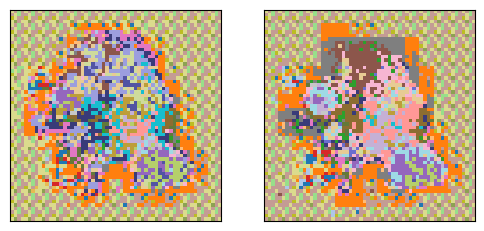

In [43]:
fig, axs = plt.subplots(ncols=neigh_ids.shape[0], figsize=(6, 4))
for i, labeled in enumerate(neigh_ids):
    axs[i].imshow(display_labeled_as_rgb(labeled, cmap=cmap))
    axs[i].set_xticks([])
    axs[i].set_yticks([])

In [69]:
counts = Counter(cluster_ids.flatten())

In [70]:
[counts[c] for c in clusters]

[17, 9, 6, 95, 99]

In [73]:
cluster_ids.shape

(4, 60, 60)

In [52]:
F.cosine_similarity(
    torch.rand(256),
    torch.rand(20, 256)
).shape

torch.Size([20])

In [48]:
F.cosine_similarity(x[...], codebook, dim=-1)

RuntimeError: The size of tensor a (60) must match the size of tensor b (40) at non-singleton dimension 2

In [39]:
import torch.nn.functional as F

In [45]:
x[n, h, w].shape, codebook[c].shape

(torch.Size([256]), torch.Size([256]))

In [ ]:
F.cosine_similarity()

In [67]:
mushroom.learner.sae.scale_factors(torch.tensor([0, 1, 2, 3]))[:, mushroom.learner.channels.index('CD45')]

tensor([ 1.6012, -0.7417,  2.3597,  0.6643], grad_fn=<SelectBackward0>)

In [152]:
ds = mushroom.learner.inference_ds

imgs = []
for idx in range(len(ds)):
    section_idx, row_idx, col_idx = ds.idx_to_coord[idx]
    section = ds.sections[section_idx]
    img = ds.section_to_tiles[section][row_idx, col_idx]
    imgs.append(img)
imgs = torch.stack(imgs)

recon_labeled = torch.stack(
    [ds.section_from_tiles(
        imgs, i,
#         size=(mushroom.learner.train_transform.output_size[0], mushroom.learner.train_transform.output_size[1])
    ) for i in range(len(ds.sections))]
)

In [153]:
with torch.no_grad():
    h, w = mushroom.recon_embs.shape[-2], mushroom.recon_embs.shape[-1]
    _, indices, _ = mushroom.learner.sae.vq(
        rearrange(mushroom.recon_embs.to(mushroom.learner.device), 'n d h w -> n (h w) d'))
    indices = rearrange(indices, 'n (h w) -> n h w', h=h, w=w).detach().cpu().numpy()

In [154]:
indices.shape

(4, 60, 60)

In [155]:
def relabel(labels):
    new = np.zeros_like(labels, dtype=labels.dtype)
    ids = np.unique(labels)
    for i in range(len(ids)):
        new[labels==ids[i]] = i
        
    return new

cluster_ids = relabel(indices)
cluster_ids.shape

(4, 60, 60)

In [156]:
np.unique(cluster_ids)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [157]:
import torchvision.transforms.functional as TF
patch_size = 32
resized_cluster_ids = TF.resize(
    torch.tensor(cluster_ids),
    (recon_labeled.shape[-2], recon_labeled.shape[-1]),
    antialias=False,
    interpolation=TF.InterpolationMode.NEAREST
).numpy()
resized_cluster_ids.shape

(4, 1920, 1920)

In [158]:
exp = []
ids = np.unique(cluster_ids)
for i in ids:
#     mask = cluster_ids == int(i)
    mask = resized_cluster_ids == int(i)
#     x = rearrange(mushroom.recon_imgs, 'n d h w -> d n h w')
    x = rearrange(mushroom.true_imgs, 'n d h w -> d n h w')
    exp.append(x[:, mask].mean(-1))

    
exp = torch.stack(exp)
exp = pd.DataFrame(data=exp.numpy(), columns=mushroom.learner.channels, index=ids)
exp = exp[~pd.isnull(exp.iloc[:, 0])]
exp


,Bap1,CD31,CD45,CD68,CD8,CK14,CK19,COX6c,DAPI,ER,...,Her2,Ki67,MGP,PLAT/tPA,PR,Pan-Cytokeratin,Podoplanin,SMA,Vimentin,cKit
0,0.135653,0.060309,0.196396,0.084181,0.013518,0.598725,0.195443,0.215644,0.444009,0.125297,...,0.095422,0.034396,0.549867,0.322370,0.230392,0.335231,0.052833,0.265551,0.286387,0.300481
1,0.102662,0.173230,0.313449,0.315419,0.014049,0.274893,0.272267,0.569661,0.479456,0.263666,...,0.165185,0.061895,0.556276,0.542538,0.306345,0.359909,0.240782,0.338380,0.344366,0.243293
2,0.214952,0.086508,0.438146,0.121400,0.039791,0.314652,0.387735,0.349714,0.633796,0.299786,...,0.233972,0.081543,0.602326,0.489407,0.410037,0.528037,0.050058,0.116576,0.319623,0.362398
3,0.022327,0.032272,0.055813,0.011232,0.013195,0.341353,0.022897,0.041572,0.203219,0.020234,...,0.015059,0.007722,0.209161,0.082997,0.137239,0.045026,0.040476,0.085965,0.160596,0.086382
4,0.256484,0.110080,0.410596,0.186311,0.034289,0.079270,0.329909,0.281702,0.535213,0.108658,...,0.121026,0.072120,0.468117,0.402524,0.285144,0.390914,0.034853,0.217675,0.285680,0.142077
5,0.038013,0.337285,0.320056,0.039905,0.052600,0.031877,0.009616,0.107503,0.552326,0.149213,...,0.063098,0.008852,0.479800,0.413995,0.210459,0.028443,0.123138,0.179513,0.679011,0.028706
6,0.062572,0.164464,0.509942,0.090697,0.132576,0.128912,0.083346,0.265080,0.551418,0.270902,...,0.073928,0.034386,0.338568,0.324116,0.215226,0.105915,0.217390,0.163324,0.496575,0.048772
7,0.002854,0.005045,0.006762,0.012790,0.005507,0.017818,0.002802,0.011778,0.075780,0.002625,...,0.002390,0.001510,0.070056,0.028942,0.026011,0.004326,0.022011,0.006881,0.032040,0.024085
8,0.357306,0.083924,0.494554,0.279103,0.035373,0.468541,0.601380,0.455954,0.726510,0.435172,...,0.390400,0.082502,0.756228,0.668009,0.514317,0.757924,0.064142,0.126356,0.212150,0.549721
9,0.179852,0.127740,0.350419,0.140682,0.016917,0.665297,0.227919,0.333807,0.438176,0.237972,...,0.152382,0.065271,0.572133,0.497277,0.307379,0.330070,0.350288,0.519348,0.472404,0.241629


In [159]:
from mushroom.visualization.utils import display_labeled_as_rgb

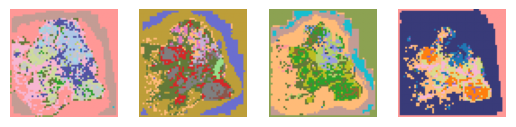

In [160]:
cmap = sns.color_palette('tab20') + sns.color_palette('tab20b') + sns.color_palette('tab20c') + sns.color_palette('tab20') + sns.color_palette('tab20b') + sns.color_palette('tab20c')
fig, axs = plt.subplots(ncols=len(ds.sections))
for ax, x in zip(axs, cluster_ids):
    x = display_labeled_as_rgb(x, cmap=cmap)
    ax.imshow(x)
    ax.axis('off')

In [77]:
np.unique(cluster_ids, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([ 216,  331,   32,  130,  206,  593,   99,  127, 3043,  792, 2913,
         191, 1452,  125,  644,   13,   61,   48,  522,   44,  164,  177,
           7,   18,  214,   17,  123,   13, 2079,    6]))

In [78]:

from sklearn.cluster import AgglomerativeClustering
dist = 50.
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=dist).fit(exp.values)
# clustering = AgglomerativeClustering(n_clusters=10, distance_threshold=None).fit(exp.values)
cluster_to_label = {c:l for c, l in zip(exp.index, clustering.labels_)}
neigh_ids = np.vectorize(cluster_to_label.get)(cluster_ids)
len(np.unique(neigh_ids))

13

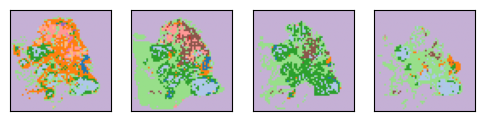

In [79]:
fig, axs = plt.subplots(ncols=neigh_ids.shape[0], figsize=(6, 4))
for i, labeled in enumerate(neigh_ids):
    axs[i].imshow(display_labeled_as_rgb(labeled, cmap=cmap))
    axs[i].set_xticks([])
    axs[i].set_yticks([])

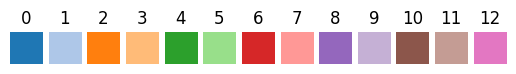

In [80]:
labels = np.unique(neigh_ids)
fig, axs = plt.subplots(ncols=len(labels))
for n, l in enumerate(labels):
    axs[n].imshow(rearrange(np.asarray(cmap[l]), 'n -> 1 1 n'))
    axs[n].axis('off')
    axs[n].set_title(str(l))
    

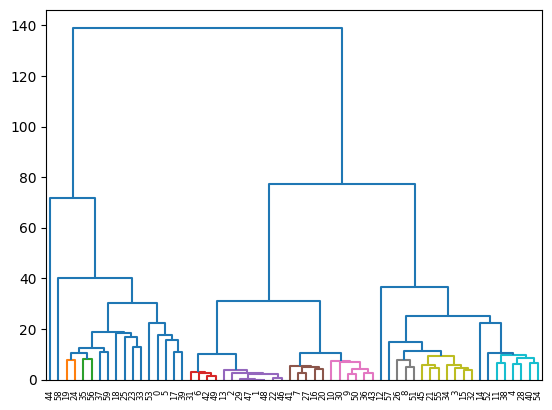

In [150]:
import scipy.cluster.hierarchy as shc
links = shc.linkage(exp.values, method ='ward')
dendrogram = shc.dendrogram((links), color_threshold=dist, labels=exp.index.to_list())